# Image Classification - Hristo Hristov

## Introduction
My personal challenge will be to make an A.I. model that can do landscapes calssifcation. The 6 landscapes include: buildings, forests, glaciers, mountains, seas and streets. I will be doing this project according to the IBM A.I. Project Methodology.


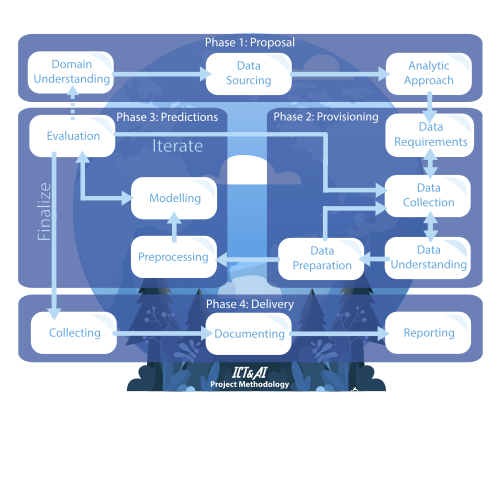

# Phase 1 - Proposal

## Domain understanding
The purpose of this project is to make an A.I. that can analyze picture and determine what kind of landscape it is. My data will have 6 different landscapes: building, forest, glacier, mountain, sea and street. My project will help people organize their images into these 6 different categories. The people who will benefit most from this are nature photographers. To achieve my goals I will explore 2 different models: SVM and Keras.

## Data sourcing
I will be sourcing my data from a already made dataset from the website keggle. The dataset can be found here: 
https://www.kaggle.com/datasets/puneet6060/intel-image-classification. The reason for me taking my data from there is that the data is already labeled and I do not have to manulaly label it. Also the data includes some images that are not labled with which I can use to test the prediction of my algorithm after it is trained

## Analytic approach
 Before we start diving into the data we must first ask ourselves some main research questions, which we will have to answer here in this notebook. 
1. Have all of our data requirements been met ?
2. Is the class distribution in our data optimal?
2. Which model fits our data best for accurate predictions?

# Phase 2 - Provisioning

##  Data requirements
Since we will be working with images we do not have a lot of data requirements, however they are all as equaly as important to make sure that our model can use the data. Our requirments are:
- Images must be in a png or jpg format
- Images must not be corrupted - meaning that the file can be opened without giving an error and that the file is in a correct image format (JPG/PNG)
- Images must containt one of the 6 target classes that we have chosen
- Images must be properly sorted in a correctly named folder that coresponds to the images that it contains. (E.g., folder named building must contain buildings)
- Images must be in 150x150  because it gives us the best increase in processing speed without losing too much detail of the picture that will affect accuracy

## Importing needed libraries

In [132]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf 
from tensorflow.keras import Sequential
from tqdm import tqdm
from PIL import Image

##  Data collection +  Data preparation

We are going to make a method that will load our data from our train and test folders into 4 different variables. While we are looping through the images in the folders we will also do a little bit of pre-prossessing, such as : checking if the selected file is an actual valid image, changing the color of the image into RGB and resizing the images. 


The data that we have is already clean as stated in the documentation of said dataset. However we will make a check using a .verify() method that will see if the image is first of all an actual image and not a different type of file and second of all to make sure that it is not corruputed. This will make sure that if something happends to an image it will not prevent the loading of all other images.

In [2]:
#These are the 6 types of terrains that our data is caterorized as
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

In [3]:
# Make our image a standerdize size of 150x150
IMAGE_SIZE = (150, 150)

In [4]:
#These arrays will collect height and widths of images after we resize them.
heights = []
widths = []

def load_data():
    #Get our dataset paths
    datasets = ['data/seg_train/seg_train', 'data/seg_test/seg_test']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
       
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            #The label is equial to the folder from where we get our image
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                try:
                    img = Image.open(img_path) # open the image file
                    img.verify() # verify that it is, in fact an image and it is not corrupted
                    
                    # Open our image
                    image = cv2.imread(img_path)
                    #Change the color of the image into RGB (some images may not be in RGB)
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    #Resize all of our images into a small 150x150 size so that we have a quicker processing
                    image = cv2.resize(image, IMAGE_SIZE) 
                    
                    height, width, channels = image.shape
                
                    # Append the image and its corresponding label to the output
                    images.append(image)
                    labels.append(label)
                    heights.append(height)
                    widths.append(width)

                    
                except (IOError, SyntaxError) as e:
                    print('Bad file:', img_path) # print out the names of corrupt files
                
                
        #Convert our images into numpy array so that we can use them for our model.        
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

Here we can see that our method detects the invalid files that are in the datasets.

In [5]:
#Load our data
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading data/seg_train/seg_train


100%|████████████████████████████████████████████████████████████████████████████| 2192/2192 [00:01<00:00, 1125.44it/s]


Bad file: data/seg_train/seg_train\buildings\decoy.txt


100%|████████████████████████████████████████████████████████████████████████████| 2382/2382 [00:01<00:00, 1207.97it/s]


Loading data/seg_test/seg_test


100%|██████████████████████████████████████████████████████████████████████████████| 501/501 [00:00<00:00, 1198.80it/s]


We can see that we have a total of 17,034 images

In [6]:
TotalImages = len(train_images) + len(test_images)
TotalImages

17034

We can see that we have the same amount of heights and widths as our total images which means we correctly collected the data.

In [7]:
print('Number of image heights:' , len(heights))
print('Number of image widths:' , len(widths))

Number of image heights: 17034
Number of image widths: 17034


Let's plot the height at width distribution between all pictures and as we can see on the plot there is one whole bar that doesn't move. That means that every picture does correctly have a height and width of 150x150.

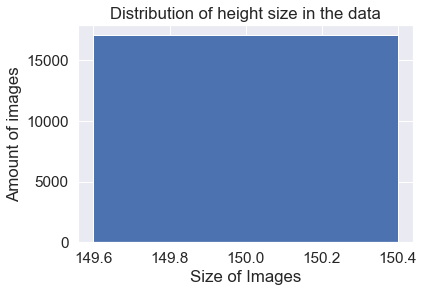

In [8]:
plt.title("Distribution of height size in the data") 
plt.xlabel("Size of Images") 
plt.ylabel("Amount of images") 
plt.bar(heights,TotalImages) 
plt.show()

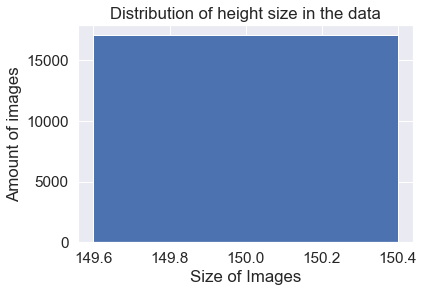

In [9]:
plt.title("Distribution of height size in the data") 
plt.xlabel("Size of Images") 
plt.ylabel("Amount of images") 
plt.bar(widths,TotalImages) 
plt.show()

## Data Understanding
Let's start understanind our data by plotting the class distribution in our train and test and answering the 2nd question. 2A: We can see that there is already a pretty good and even distribution between the classes in our train and test data, meaning that we will not need to reshuffle our data.

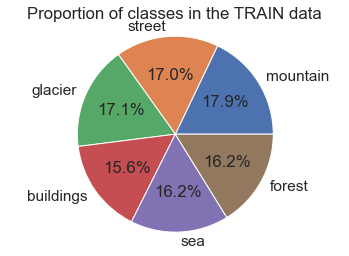

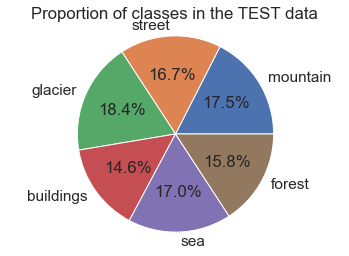

In [10]:
import pandas as pd

#Count the labels we have 
_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)

#Plot the result of our train counting
plt.pie(train_counts,
        explode=(0, 0, 0, 0, 0, 0) , 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of classes in the TRAIN data')
plt.show()

#Plot the result of our test counting
plt.pie(test_counts,
        explode=(0, 0, 0, 0, 0, 0) , 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of classes in the TEST data')
plt.show()

When we compare our train dataset to our test dataset we can see that the data is evenly distributed between all of our classes, thus there is no need for us to reshuffle our data.

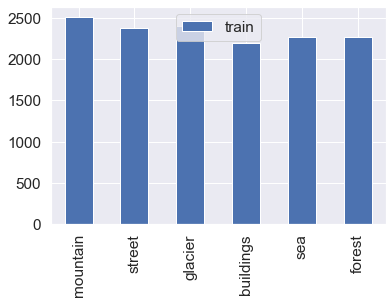

In [11]:
pd.DataFrame({'train': train_counts,
                    }, 
             index=class_names
            ).plot.bar()
plt.show()

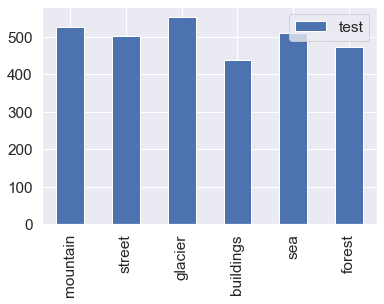

In [12]:
pd.DataFrame({'test': test_counts}, 
             index=class_names
            ).plot.bar()
plt.show()

Let's actually see some examples of our images by printing out 25 random images from out train dataset with the corresponding label

In [156]:
def display_examples(class_names, images, labels):
 
 # Display 25 random images from the dataset
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    
    for i in range(25):
        #Take a random index from our image array
        index = np.random.randint(images.shape[0])
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        #Show the image using the randomly made index
        plt.imshow(images[index], cmap=plt.cm.binary)
        #Take the label using the same random index
        plt.xlabel(class_names[labels[index]])
    plt.show()
    

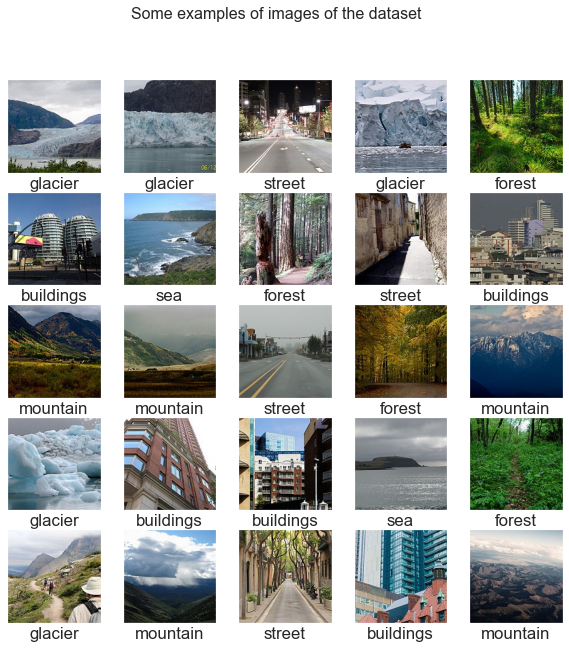

In [157]:
display_examples(class_names, train_images, train_labels)

## Data preparation 
We are going to scale our images again due to the reason that we have over 4000 images and we will need our model to process them in a reasonable amount of time. Also in our particular case (landscape classification) we are not interested in any particular object in the images, we are not doing any object detection.

In [15]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

## Conclusion

# Phase 3 - Prediction

## Modeling

I will be using first the keras layers model. Here is the description for what each layer does:

keras.layers.Conv2D is a 2D Convolution Layer and this layer creates a convolution kernel that is wind with layers input which helps produce a tensor of outputs. In the param we use filters = 10 which is mean is the number of filters that the convolutional layer will learn. kernel_size = 3,  it's a 2-tuple specifying the width and height of the 2D convolution window and kernel_size must be an odd integer as well. Activation = relu, relu is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero.

Keras.layers.MaxPool2D is a Max pooling operation for 2D spatial data. Downsamples the input along its spatial dimensions like height and width by taking the maximum value over an input of size defined by pool_size for each channel of the input. In the param we use pool_size = 2, it's an integer or tuple of 2 integers, window size over which to take the maximum. We only specified 1 integer which is mean we're going to use the same window length. For padding we use = valid which means means no padding.

keras.layers.Flatten is use to flattens the multi-dimensional input tensors into a single dimension.

keras.layers.Dense, we're going to use it on the output layer to performs dot product of input tensor and weight kernel matrix. In the param we use units = units = len(classes), classes is th list of the unique label (or images) in the train_df. Activation = softmax is used as the activation for the last layer of a classification network because the result could be interpreted as a probability distribution.

In [16]:
#Make our model
KerasModel = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [17]:
#Compile our model
KerasModel.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

We are going to use 2 callback methods when fitting our data. One that will stop running our epoch after it detects that we are overfitting our data and the second to tell us how much time it takes for each epoch to run.


In [18]:
import time

from keras import callbacks
#This method will stop running our ephos after it has determined that the accuracy no-longer increases as need
earlystopping = callbacks.EarlyStopping(monitor = 'accuracy',mode = 'min',patience = 5,restore_best_weights=True,verbose=1)

#This method will track the time and in the end tell us how long it took for the epoch to run
class timecallback(tf.keras.callbacks.Callback):
    def __init__(self):
        self.times = []
        # use this value as reference to calculate cummulative time taken
        self.timetaken = time.perf_counter()
    def on_epoch_end(self,epoch,logs = {}):
        self.times.append((epoch,time.perf_counter() - self.timetaken))
    def on_train_end(self,logs = {}):
        plt.xlabel('Epoch')
        plt.ylabel('Total time taken until an epoch in seconds')
        plt.plot(*zip(*self.times))
        plt.show()

Our model was struggling to achive high accuracy due to a couple of reasons: 
- Incorrect ephocs defined, making the data overfitted
- Layer tweaks were needed

Sources: https://datascience.stackexchange.com/questions/57171/how-to-improve-low-accuracy-keras-model-design
- DOT Framework : Library
- Method : Literature Study

For further improvments we will need to do some hyperparamter tuning
- https://towardsdatascience.com/hyperparameter-optimization-with-keras-b82e6364ca53
- DOT Framework : Library
- Method : Literature Study

Epoch 1/5
878/878 [==============================] - 145s 165ms/step - loss: 0.9435 - accuracy: 0.6424
Epoch 2/5
878/878 [==============================] - 152s 173ms/step - loss: 0.5993 - accuracy: 0.7804
Epoch 3/5
878/878 [==============================] - 149s 169ms/step - loss: 0.3630 - accuracy: 0.8726
Epoch 4/5
878/878 [==============================] - 135s 153ms/step - loss: 0.1780 - accuracy: 0.9424
Epoch 5/5
878/878 [==============================] - 148s 168ms/step - loss: 0.0889 - accuracy: 0.9730


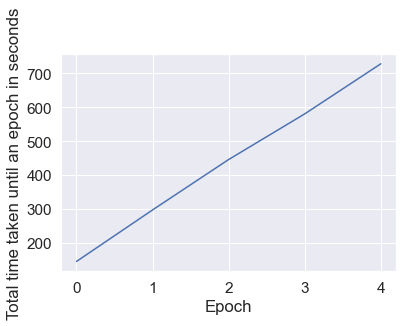

In [19]:
#Initiate the timecallback method
timeittakes = timecallback()
#Do our actual prediction
prediction = KerasModel.fit(train_images, train_labels, batch_size=16, epochs=5, callbacks = [timeittakes,earlystopping])

## Evaluation

Let's evalate our results that we have after running our model. We can see that after each ephoc the acurracy is increasing and the loss is decreasing

In [20]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "accuracy")
    plt.title("train_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    #Plot our loss
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.title("train_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

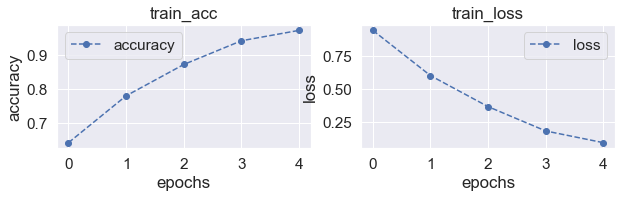

In [21]:
plot_accuracy_loss(prediction)

When we evaluate our model on our test images we can see that we still have around 80 accuracy

In [22]:
evaluation = KerasModel.evaluate(test_images, test_labels)

94/94 [==============================] - 9s 90ms/step - loss: 1.0036 - accuracy: 0.7610


Lets display a random image and the it's predicted label

In [23]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """
    
    #Take a random index
    index = np.random.randint(images.shape[0])
    plt.figure()
    #Show random image from the variable 'images' provided
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

In [221]:
predictions = KerasModel.predict(test_images)     # Predict the test images
pred_labels = np.argmax(predictions, axis = 1) # Take the prediction labels from the actual prediction

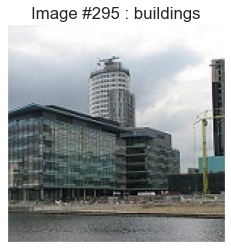

In [222]:
#Display a random image from the predicted test images
display_random_image(class_names, test_images, pred_labels)

## Predicting photos from personal galery
Now let's take some photos that I have stored in my pc and see how it will predict them. First we will make 2 methods that will convert the prediction label into a string so we can understand what class was predicted and the render_image methods so we can see the actual image

In [211]:
#Show all the labels we have
class_names_label

{'mountain': 0,
 'street': 1,
 'glacier': 2,
 'buildings': 3,
 'sea': 4,
 'forest': 5}

In [212]:
def getClass(predLabel):
    #We start at 0
    i = 0
    #Because X is an array we need to go into the array itself
    for x in predclass:
        #Inside the array looks like this [0,0,0,0,0,1]. Where 1 is the what the machine predicted the class to be.
        for xb in x:
            #If the number is 1 that means that is the predicted label
            if xb == 1:
                return class_names[i]
            i += 1

In [213]:
def render_image(image):
    #Remove the grid from the plot
    plt.rcParams["axes.grid"] = False
    plt.figure(figsize = (12, 8))
    #Remove the x and y names
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    #Show the image
    plt.imshow(np.squeeze(image).astype('uint8'))
    #Show the labe
    plt.xlabel(getClass(predclass))
    plt.show

Now let's take 2 images, load them and predict what they are

In [214]:
from keras.preprocessing import image

img = image.load_img('sis.jpg', target_size = IMAGE_SIZE)
img = image.img_to_array(img)
img = np.expand_dims(img, axis = 0)

predclass = KerasModel.predict(img)

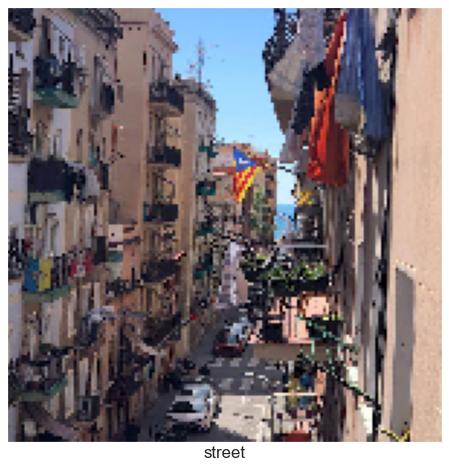

In [215]:
render_image(img)

In [216]:
img = image.load_img('Vacation.jpg', target_size = IMAGE_SIZE)
img = image.img_to_array(img)
img = np.expand_dims(img, axis = 0)

predclass = KerasModel.predict(img)

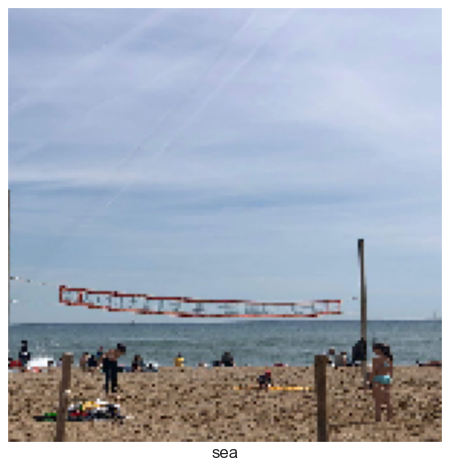

In [217]:
render_image(img)

## Evaluating mislabled data

Let's print out 25 random images that have been mislabeled by our model

In [218]:
def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):
        #Print 25 examples of mislabeled images by the classifier, e.g when test_labels != pred_labels
        
    #This will give us a result of either 1 or 0. 1 being a correct label, 0 being an incorrect label    
    BOO = (test_labels == pred_labels)
    #Take all indexes that are 0 (wrongly predicted)
    mislabeled_indices = np.where(BOO == 0)
    #Take mislabeled images
    mislabeled_images = test_images[mislabeled_indices]
    #Take the incorrect predicted label
    mislabeled_labels = pred_labels[mislabeled_indices]

    #Display them
    display_examples(class_names, mislabeled_images, mislabeled_labels)

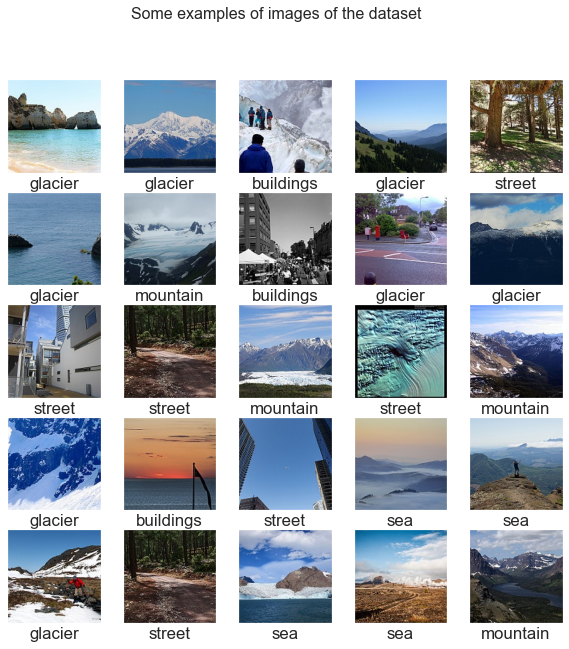

In [219]:
print_mislabeled_images(class_names, test_images, test_labels, pred_labels)

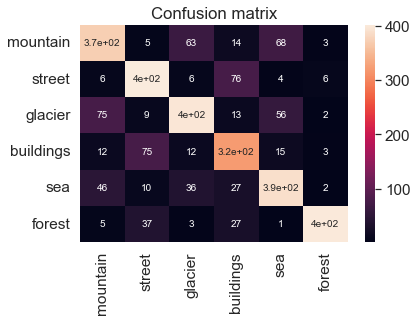

In [34]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

# Trying out our second model - SVM
To try our second model we need to go through the IBM methodology again

## Data collecton - Looping back
Now that we have tried our keras model, let's try to see how a SVM model will perform. First we will load the data

In [35]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt

flat_data_arr=[] #input array
target_arr=[] #output array
datadir='data/seg_SVMtrain/seg_SVMtrain' 

#path which contains all the categories of images
for i in os.listdir(datadir):
    
    print(f'loading... category : {i}')
    for img in tqdm(os.listdir(os.path.join(datadir, i))):
        try:
            #Join the path for our image 
            img_path = os.path.join(os.path.join(datadir, i), img)    
             # open the image file
            img = Image.open(img_path)
            # verify that it is, in fact an image
            img.verify() 
            #Add the image to the array
            img_array=imread(img_path)
            #Resize all of our images from the array into 150x150 size 
            img_resized=resize(img_array,(150,150,3))
            flat_data_arr.append(img_resized.flatten())
            #Add our resized array
            target_arr.append(os.listdir(datadir).index(i))
                    
        except (IOError, SyntaxError) as e:
            print('Bad file:', img_path) # print out the names of corrupt files
    print(f'loaded category:{i} successfully')        
            
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
#Convert our data into a dataframe
df=pd.DataFrame(flat_data) 
#Add our target column to the dataframe
df['Target']=target
   
x=df.iloc[:,:-1] #x data 
y=df.iloc[:,-1] #y data

loading... category : buildings


100%|███████████████████████████████████████████████████████████████████████████████| 456/456 [00:03<00:00, 125.92it/s]


Bad file: data/seg_SVMtrain/seg_SVMtrain\buildings\decoy.txt
loaded category:buildings successfully
loading... category : forest


100%|███████████████████████████████████████████████████████████████████████████████| 527/527 [00:04<00:00, 125.19it/s]


loaded category:forest successfully
loading... category : glacier


100%|███████████████████████████████████████████████████████████████████████████████| 444/444 [00:03<00:00, 124.64it/s]


loaded category:glacier successfully
loading... category : mountain


100%|███████████████████████████████████████████████████████████████████████████████| 536/536 [00:04<00:00, 125.96it/s]


loaded category:mountain successfully
loading... category : sea


100%|███████████████████████████████████████████████████████████████████████████████| 402/402 [00:03<00:00, 125.61it/s]


loaded category:sea successfully
loading... category : street


100%|███████████████████████████████████████████████████████████████████████████████| 422/422 [00:03<00:00, 122.23it/s]


loaded category:street successfully


In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#Split our data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
print('Splitted Successfully')


Splitted Successfully


## Data understanding

Here we can see our train images for our SVM model. They have been converted to fit into a dataframe. Each number for a row is a pixel that the computer can convert and read.

In [37]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499
599,0.501961,0.517647,0.552941,0.376471,0.396078,0.419608,0.564706,0.576471,0.596078,0.658824,...,4.980392e-01,0.572549,0.380392,0.360784,0.317647,0.172549,0.141176,3.921569e-01,2.862745e-01,2.588235e-01
1518,0.905882,0.941176,0.960784,0.901961,0.937255,0.956863,0.901961,0.937255,0.956863,0.901961,...,2.666667e-01,0.345098,0.392157,0.298039,0.313725,0.360784,0.282353,3.058824e-01,3.568627e-01,2.862745e-01
2746,0.807843,0.847059,0.854902,0.592157,0.631373,0.627451,0.537255,0.580392,0.549020,0.219608,...,3.176471e-01,0.294118,0.298039,0.313725,0.294118,0.298039,0.313725,2.901961e-01,2.941176e-01,3.098039e-01
100,0.164706,0.533333,0.745098,0.149020,0.545098,0.764706,0.152941,0.549020,0.752941,0.200000,...,4.705882e-02,0.090196,0.129412,0.035294,0.090196,0.129412,0.031373,8.627451e-02,1.372549e-01,3.529412e-02
315,0.219608,0.172549,0.219608,0.200000,0.160784,0.203922,0.180392,0.141176,0.184314,0.313725,...,3.568627e-01,0.572549,0.427451,0.356863,0.572549,0.427451,0.364706,5.686275e-01,4.235294e-01,3.607843e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,0.239216,0.533333,0.788235,0.172549,0.466667,0.721569,0.109804,0.415686,0.674510,0.098039,...,2.666667e-01,0.223529,0.235294,0.294118,0.321569,0.329412,0.388235,3.215686e-01,3.294118e-01,3.882353e-01
1095,0.756863,0.803922,0.858824,0.760784,0.796078,0.862745,0.752941,0.784314,0.858824,0.737255,...,8.980392e-01,0.843137,0.882353,0.980392,0.572549,0.611765,0.717647,3.529412e-01,3.882353e-01,5.019608e-01
1130,0.482353,0.498039,0.509804,0.482353,0.498039,0.509804,0.486275,0.501961,0.513725,0.490196,...,6.745098e-01,0.741176,0.733333,0.686275,0.717647,0.709804,0.662745,7.529412e-01,7.450980e-01,6.980392e-01
1294,0.239216,0.380392,0.521569,0.207843,0.356863,0.501961,0.215686,0.368627,0.521569,0.172549,...,6.666667e-01,0.611765,0.658824,0.643137,0.600000,0.647059,0.631373,6.235294e-01,6.705882e-01,6.549020e-01


These are the labels for our image files. They go from 0 to 5, coresponding to our 6 different landscapes

In [38]:
y_train

599     1
1518    3
2746    5
100     0
315     0
       ..
1638    3
1095    2
1130    2
1294    2
860     1
Name: Target, Length: 2228, dtype: int32

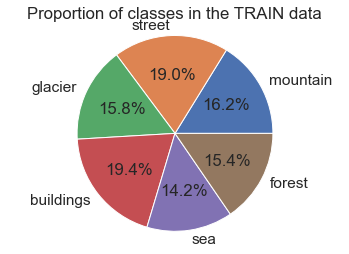

In [39]:
#Count the labels we have 
_, train_counts = np.unique(y_train, return_counts=True)
#Plot the result of our train and test counting
plt.pie(train_counts,
        explode=(0, 0, 0, 0, 0, 0) , 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of classes in the TRAIN data')
plt.show()


## Modeling

Import our SVM model and set some parameters to see how it would perform

In [40]:
from sklearn.svm import SVC # SVC is for classification, an SVR for regression exists as well.
SVMModel = SVC(gamma = 'scale')
SVMModel.fit(x_train,y_train)

SVC()

In [41]:
y_pred=SVMModel.predict(x_test)

We can see that our model has an average accuracy which is not good. 

In [42]:
from sklearn.metrics import accuracy_score
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")

The model is 62.00716845878136% accurate


## Evaluation

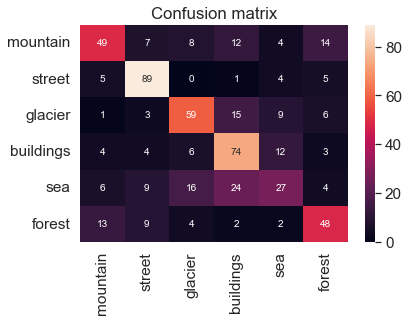

In [43]:
CM = confusion_matrix(y_test, y_pred)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

Let's try to improve our accuracy by tuning our hyperparameters using Grid Search

In [44]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

param_grid={'C':[0.1,1],'gamma':['scale','auto'],'kernel':['rbf','poly']}
svc=svm.SVC(probability=False)
SVMModel=GridSearchCV(svc,param_grid)

In [45]:
SVMModel.fit(x_train,y_train)
print('The Model is trained well with the given images')
#model.best_params_ contains the best parameters obtained from GridSearchCV

The Model is trained well with the given images


In [46]:
SVMModel.best_params_

{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

In [47]:
y_pred=SVMModel.predict(x_test)

Even after tuning our hyperparameters we still get quite a low accuracy. This tells us that SVM is not a good model to use in this particular case

In [48]:
from sklearn.metrics import accuracy_score
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")

The model is 62.00716845878136% accurate


# Predicting unlabeled data and sorting it in correct folders 

## Loading our data and preparing it

In [84]:
def predData():
#Get our dataset paths
    datasets = 'data/seg_pred/seg_pred'
    imagess = []

    # Iterate through each image in our folder
    for file in tqdm(os.listdir(datasets)):

        # Get the path name of the image
        img_path = os.path.join(datasets, file)
        img_path = img_path.replace("\\","/")
        try:
            img = Image.open(img_path) # open the image file
            img.verify() # verify that it is, in fact an image and it is not corrupted

            # Open our image
            image = cv2.imread(img_path)
            #Change the color of the image into RGB (some images may not be in RGB)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            #Resize all of our images into a small 150x150 size so that we have a quicker processing
            image = cv2.resize(image, (150,150)) 

            imagess.append(image)
            
            


        except (IOError, SyntaxError) as e:
            print('Bad file:', img_path) # print out the names of corrupt files


#Convert our images into numpy array so that we can use them for our model.        
    #imagess = np.array(images, dtype = 'float32')

 # Append the image and its corresponding label to the output
    imagess = np.array(imagess, dtype = 'float32')
    return imagess

In [85]:
pred_images = predData()

100%|████████████████████████████████████████████████████████████████████████████| 7301/7301 [00:06<00:00, 1155.41it/s]


In [244]:
len(pred_images)

7301

Scaling our data

In [86]:
pred_images = pred_images / 255.0

## Predicting our data

In [87]:
predictions = KerasModel.predict(pred_images)
predictions

array([[4.5333392e-05, 2.7904746e-01, 7.9286528e-06, 7.1964133e-01,
        1.3265919e-05, 1.2446661e-03],
       [1.4772066e-01, 8.5571126e-05, 1.7246250e-02, 1.0595287e-02,
        8.2194757e-01, 2.4045762e-03],
       [1.9353468e-13, 9.6316606e-01, 8.3547246e-11, 3.6833931e-02,
        8.6088493e-13, 3.5143223e-08],
       ...,
       [4.3477887e-01, 2.9544564e-04, 3.2192450e-02, 1.2133573e-03,
        5.2921313e-01, 2.3066995e-03],
       [1.3571140e-11, 1.3492427e-10, 5.9980817e-07, 1.5876608e-09,
        2.1666361e-11, 9.9999940e-01],
       [1.0224403e-14, 9.6735471e-01, 6.0552632e-11, 3.2645170e-02,
        3.3383401e-13, 1.1203741e-07]], dtype=float32)

In [90]:
pred_labels = np.argmax(predictions, axis = 1)
pred_labels

array([3, 4, 1, ..., 4, 5, 1], dtype=int64)

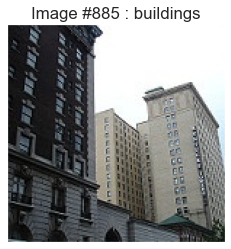

In [91]:
display_random_image(class_names, pred_images, pred_labels)

## Sorting our data based on our prediction

In [246]:
class_names_label

{'mountain': 0,
 'street': 1,
 'glacier': 2,
 'buildings': 3,
 'sea': 4,
 'forest': 5}

In [202]:
path = './data/sorted'
if os.path.isdir(path) is False:
    os.mkdir(path)

In [203]:
for label in class_names:
    labeldir = path + '/' + label
    if os.path.isdir(labeldir) is False:
        os.mkdir(labeldir)

In [204]:
def CountImagesInSorted():
    # folder path
    dir_path = 'data/sorted'
    count = 0
    # Iterate directory
    for label in os.listdir(dir_path):
        labelpath = dir_path + '/' + label
        for file in os.listdir(labelpath):
        # check if current path is a file
            folder = dir_path + '/' + label
            if os.path.isfile(folder + '/' + file):
                count += 1
    print('File count:', count)

In [205]:
CountImagesInSorted()

File count: 0


In [206]:
import shutil

source = './data/seg_pred/seg_pred'
destination = './data/sorted'

i = 0

for file in tqdm(os.listdir(source)):
    
    filepath = source + '/' + file
    destpath = destination + '/' + class_names[pred_labels[i]] + '/' + file
    shutil.copy(filepath,destpath)
    i += 1

100%|████████████████████████████████████████████████████████████████████████████| 7301/7301 [00:06<00:00, 1090.78it/s]


In [245]:
CountImagesInSorted()

File count: 7301


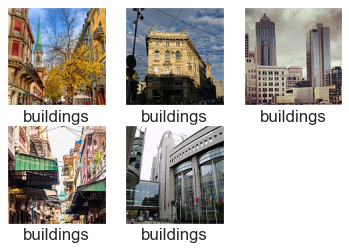

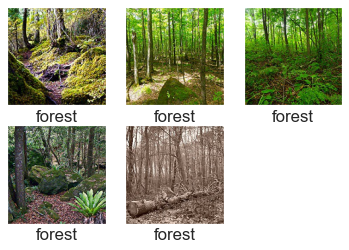

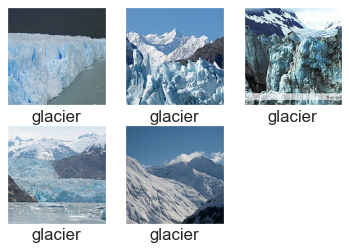

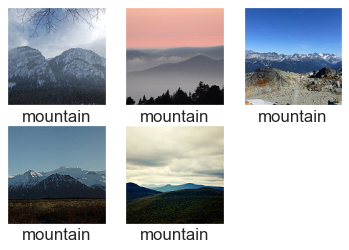

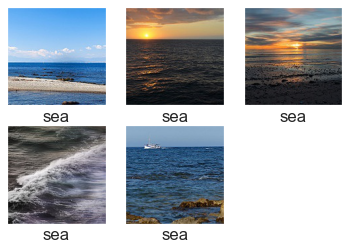

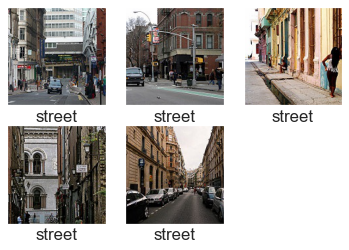

In [242]:
import matplotlib.image as mpimg

directory=os.listdir('./data/sorted')
for each in directory:
    plt.figure()
    currentFolder = './data/sorted/' + each
    for i, file in enumerate(os.listdir(currentFolder)[0:5]):
        fullpath = currentFolder + "/" + file
        img=mpimg.imread(fullpath)
        plt.subplot(2, 3, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.xlabel(each)
        plt.imshow(img)

# Phase 4 - Delivery

## Collecting, Documenting, Reporting